<a href="https://colab.research.google.com/github/sheikh495/MachineLearning/blob/main/Project_1_Naive_Bayesian_Classifier_V1_Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [35]:
#COSC 522 UTK
#Project 1
#Student Name: Sheikh Uddin

In [36]:
#load in data
import pandas as pd

url = 'https://gist.github.com/rhema/3b4b729d98978b9020d85c9b9e7c9dd6/raw/e0831e96129b2a0af0c696efe132cb8503c1e631/NormalWaterFlyingPokemon.csv'
all_data = pd.read_csv(url)

In [37]:
print(all_data.tail())
print(len(all_data))

           Name    HP Attack Defense    Type
292  Butterfree  High    Low     Low  Flying
293     Spearow   Low    Low     Low  Normal
294    Delibird   Low    Low     Low  Flying
295  Feraligatr   Mid    Mid     Mid   Water
296    Bunnelby   Low    Low     Low  Normal
297


In [38]:
train_data = all_data.iloc[:275,:]
test_data = all_data.iloc[275:,:]
print(len(test_data))

22


In [39]:
print("Training Data:")
print(train_data.head())

print("\nTest Data:")
print(test_data.head())

Training Data:
         Name    HP Attack Defense    Type
0    Vigoroth   Mid   High     Mid  Normal
1      Dodrio  High    Mid    High  Normal
2  Farfetch'd   Low   High     Low  Normal
3    Lillipup   Low    Low     Low  Normal
4   Jellicent   Mid    Low    High   Water

Test Data:
          Name    HP Attack Defense    Type
275  Pidgeotto  High    Low     Low  Normal
276      Zubat   Low    Low     Low  Flying
277  Igglybuff   Mid    Low     Low  Normal
278    Watchog  High   High    High  Normal
279     Pyroar   Mid   High    High  Normal


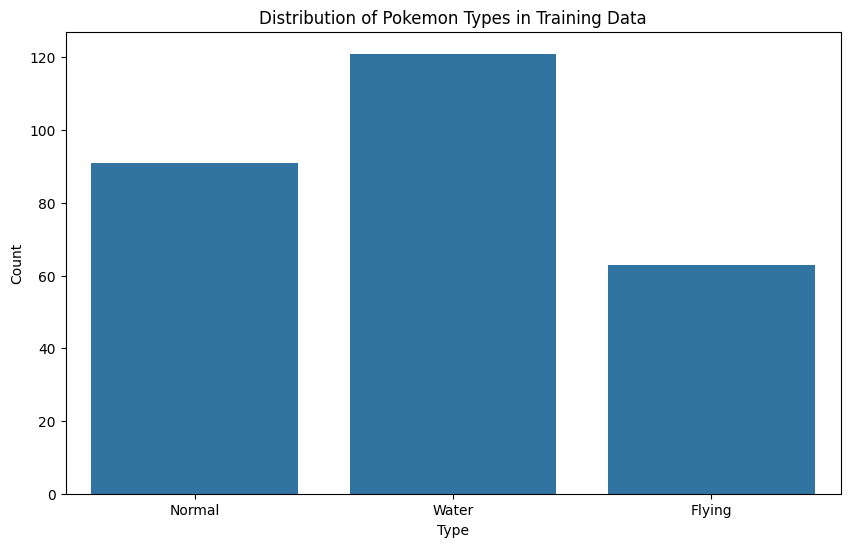

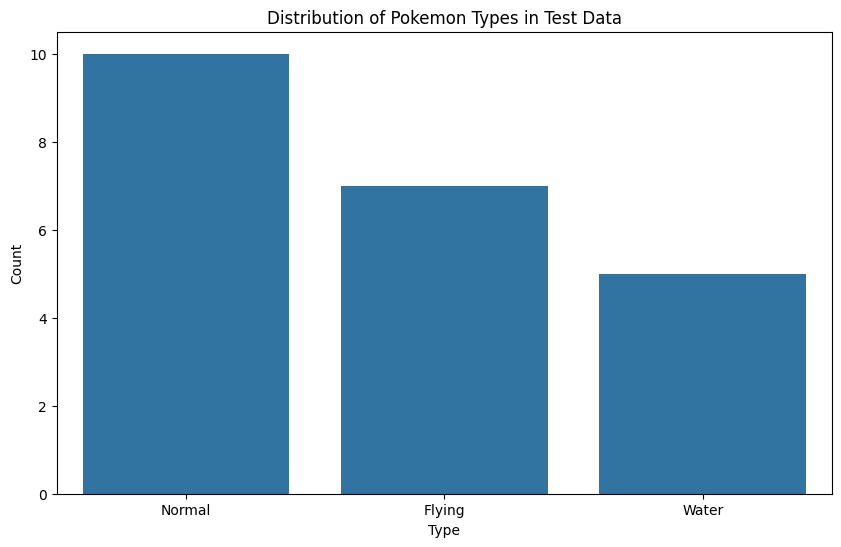

In [40]:
import matplotlib.pyplot as plt
import seaborn as sns

# Visualize training data
plt.figure(figsize=(10, 6))
sns.countplot(x='Type', data=train_data)
plt.title('Distribution of Pokemon Types in Training Data')
plt.xlabel('Type')
plt.ylabel('Count')
plt.show()

# Visualize test data
plt.figure(figsize=(10, 6))
sns.countplot(x='Type', data=test_data)
plt.title('Distribution of Pokemon Types in Test Data')
plt.xlabel('Type')
plt.ylabel('Count')
plt.show()


In [41]:
## Code for buildling the classifier
## Train only with the "train_data"

In [42]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder

# Load the data
url = 'https://gist.github.com/rhema/3b4b729d98978b9020d85c9b9e7c9dd6/raw/e0831e96129b2a0af0c696efe132cb8503c1e631/NormalWaterFlyingPokemon.csv'
all_data = pd.read_csv(url)

# Separate train and test data
train_data = all_data.iloc[:275, :]
test_data = all_data.iloc[275:, :]

# Separate features (X) and target variable (y) for training data
X_train = train_data.drop(columns=['Type'])  # Features
y_train = train_data['Type']  # Target variable

# Initialize label encoder
label_encoder = LabelEncoder()

# Encode categorical features in X_train if needed
for column in X_train.columns:
    if X_train[column].dtype == 'object':
        X_train[column] = label_encoder.fit_transform(X_train[column])

# Initialize and train the Random Forest Classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train, y_train)



RandomForestClassifier(random_state=42)

Accuracy: 0.4


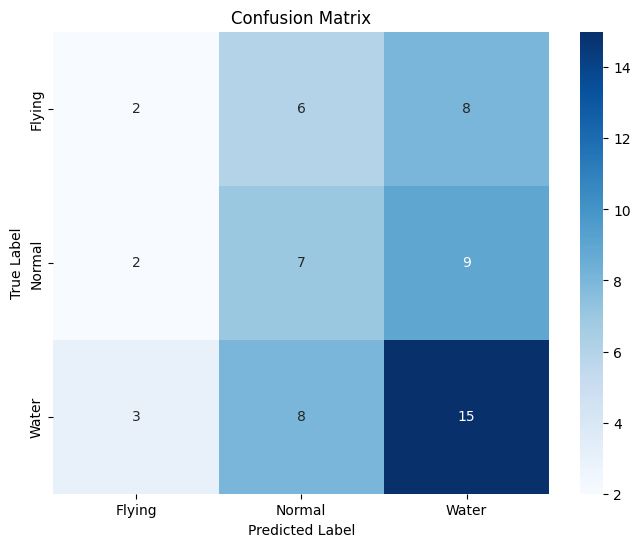

In [43]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.model_selection import train_test_split

# Load the data
url = 'https://gist.github.com/rhema/3b4b729d98978b9020d85c9b9e7c9dd6/raw/e0831e96129b2a0af0c696efe132cb8503c1e631/NormalWaterFlyingPokemon.csv'
all_data = pd.read_csv(url)

# Separate features (X) and target variable (y)
X = all_data.drop(columns=['Type'])
y = all_data['Type']

# One-hot encode categorical features
onehot_encoder = OneHotEncoder()
X_encoded = pd.DataFrame(onehot_encoder.fit_transform(X[['Name', 'HP', 'Attack', 'Defense']]).toarray(), columns=onehot_encoder.get_feature_names_out(['Name', 'HP', 'Attack', 'Defense']))
X_encoded = pd.concat([X_encoded, X.drop(columns=['Name', 'HP', 'Attack', 'Defense'])], axis=1)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

# Initialize and train the Random Forest Classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train, y_train)

# Predict on the test data
y_pred = rf_classifier.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Create a confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=rf_classifier.classes_, yticklabels=rf_classifier.classes_)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()


In [44]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Load the data
url = 'https://gist.github.com/rhema/3b4b729d98978b9020d85c9b9e7c9dd6/raw/e0831e96129b2a0af0c696efe132cb8503c1e631/NormalWaterFlyingPokemon.csv'
all_data = pd.read_csv(url)

# Separate features (X) and target variable (y)
X = all_data.drop(columns=['Type'])  # Features
y = all_data['Type']  # Target variable

# Initialize label encoder
label_encoder = LabelEncoder()

# Encode the target variable
y_encoded = label_encoder.fit_transform(y)

# Encode categorical features in X
for column in X.columns:
    if X[column].dtype == 'object':
        X[column] = label_encoder.fit_transform(X[column])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

# Initialize and train the Random Forest Classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train, y_train)

# Optionally, evaluate the model
y_pred = rf_classifier.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy on the test set:", accuracy)


Accuracy on the test set: 0.48333333333333334


In [45]:
# Return probability and the class
def predict(row):
    # Predict class probabilities
    class_probabilities = rf_classifier.predict_proba([row])[0]

    # Get the predicted class index
    predicted_class_index = rf_classifier.predict([row])[0]

    # Map class index to class label
    class_labels = {0: "Normal", 1: "Water", 2: "Flying"}
    predicted_class_label = class_labels[predicted_class_index]

    # Return probability and the class
    return {"probability": class_probabilities, "class": predicted_class_label}


In [46]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Load the data
url = 'https://gist.github.com/rhema/3b4b729d98978b9020d85c9b9e7c9dd6/raw/e0831e96129b2a0af0c696efe132cb8503c1e631/NormalWaterFlyingPokemon.csv'
all_data = pd.read_csv(url)

# Separate features (X) and target variable (y)
X = all_data.drop(columns=['Type'])  # Features
y = all_data['Type']  # Target variable

# Initialize label encoder
label_encoder = LabelEncoder()

# Encode the target variable
y_encoded = label_encoder.fit_transform(y)

# Encode categorical features in X
for column in X.columns:
    if X[column].dtype == 'object':
        X[column] = label_encoder.fit_transform(X[column])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

# Initialize and train the Random Forest Classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train, y_train)

# Optionally, evaluate the model
y_pred = rf_classifier.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy on the test set:", accuracy)

# Return probability and the class
def predict(row):
    # Predict class probabilities
    class_probabilities = rf_classifier.predict_proba(row)[0]

    # Get the predicted class index
    predicted_class_index = rf_classifier.predict(row)[0]

    # Map class index to class label
    class_labels = {0: "Normal", 1: "Water", 2: "Flying"}
    predicted_class_label = class_labels[predicted_class_index]

    # Print output
    print("Probability:", class_probabilities)
    print("Predicted class:", predicted_class_label)

    # Return probability and the class
    return {"probability": class_probabilities, "class": predicted_class_label}

# Example usage: pass a single row of data to the function
row_index = 0  # Change this to select a different row
predict(X_test.iloc[[row_index]])


Accuracy on the test set: 0.48333333333333334
Probability: [0.27 0.65 0.08]
Predicted class: Water


{'probability': array([0.27, 0.65, 0.08]), 'class': 'Water'}

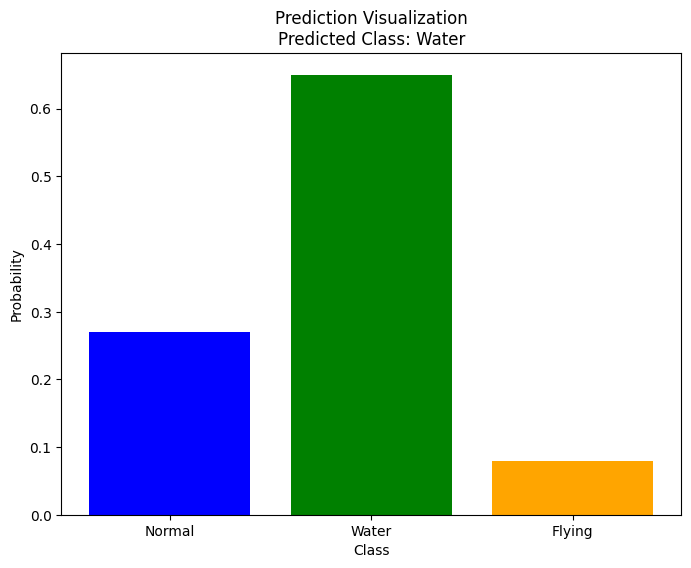

In [47]:
import matplotlib.pyplot as plt

# Data
probability = [0.27, 0.65, 0.08]
predicted_class = 'Water'

# Plot
plt.figure(figsize=(8, 6))
plt.bar(['Normal', 'Water', 'Flying'], probability, color=['blue', 'green', 'orange'])
plt.xlabel('Class')
plt.ylabel('Probability')
plt.title('Prediction Visualization\nPredicted Class: ' + predicted_class)
plt.show()


In [48]:
## Return probability and the class
def predict(row):
  return {"score":0,"class":"TBD"}#should be replaces with "Normal", "Water", or "Flying"

In [49]:
### Use this loop to provide
for row in test_data.iterrows():
  print(print(row[1]["Name"]), print(predict(row[1])))
  # break

Pidgeotto
{'score': 0, 'class': 'TBD'}
None None
Zubat
{'score': 0, 'class': 'TBD'}
None None
Igglybuff
{'score': 0, 'class': 'TBD'}
None None
Watchog
{'score': 0, 'class': 'TBD'}
None None
Pyroar
{'score': 0, 'class': 'TBD'}
None None
Sawsbuck
{'score': 0, 'class': 'TBD'}
None None
Suicune
{'score': 0, 'class': 'TBD'}
None None
Zangoose
{'score': 0, 'class': 'TBD'}
None None
Azumarill
{'score': 0, 'class': 'TBD'}
None None
Squirtle
{'score': 0, 'class': 'TBD'}
None None
Togetic
{'score': 0, 'class': 'TBD'}
None None
Gliscor
{'score': 0, 'class': 'TBD'}
None None
Noibat
{'score': 0, 'class': 'TBD'}
None None
Skiploom
{'score': 0, 'class': 'TBD'}
None None
Snorlax
{'score': 0, 'class': 'TBD'}
None None
Simipour
{'score': 0, 'class': 'TBD'}
None None
Chansey
{'score': 0, 'class': 'TBD'}
None None
Butterfree
{'score': 0, 'class': 'TBD'}
None None
Spearow
{'score': 0, 'class': 'TBD'}
None None
Delibird
{'score': 0, 'class': 'TBD'}
None None
Feraligatr
{'score': 0, 'class': 'TBD'}
None None

In [50]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score

# URL of the CSV file
url = 'https://gist.github.com/rhema/3b4b729d98978b9020d85c9b9e7c9dd6/raw/e0831e96129b2a0af0c696efe132cb8503c1e631/NormalWaterFlyingPokemon.csv'

# Load the CSV file into a pandas DataFrame
all_data = pd.read_csv(url)

# Separate features (X) and target variable (y)
X = all_data.drop(columns=['Type'])  # Features
y = all_data['Type']  # Target variable

# Initialize label encoder
label_encoder = LabelEncoder()

# Encode the target variable
y_encoded = label_encoder.fit_transform(y)

# Encode categorical features in X
for column in X.columns:
    if X[column].dtype == 'object':
        X[column] = label_encoder.fit_transform(X[column])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

# Initialize and train the Random Forest Classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train, y_train)

# Calculate accuracy on the test set
y_pred = rf_classifier.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy on the test set:", accuracy)

# Get probability estimates for each class for each sample in the test data
probabilities = rf_classifier.predict_proba(X_test)

# Get the predicted class for each sample in the test data
predicted_class = rf_classifier.predict(X_test)

# Display probabilities and predicted class for each sample
for i in range(len(X_test)):
    print(f"Sample {i+1}:")
    print("  Probabilities:")
    for j, class_name in enumerate(rf_classifier.classes_):
        print(f"    {class_name}: {probabilities[i][j]:.4f}")
    print(f"  Predicted class: {predicted_class[i]}")
    print(f"  True class: {label_encoder.inverse_transform([y_test[i]])[0]}")
    print()

# Define predict function
def predict(row):
    # Prepare the row for prediction (assuming it's a pandas Series)
    encoded_row = row.copy()
    for column in encoded_row.index:
        if encoded_row[column].dtype == 'object':
            encoded_row[column] = label_encoder.transform([encoded_row[column]])[0]

    # Get probability estimates for each class for the given row
    row_probabilities = rf_classifier.predict_proba([encoded_row])[0]

    # Get the predicted class for the given row
    predicted_class_index = rf_classifier.predict([encoded_row])[0]
    predicted_class = label_encoder.inverse_transform([predicted_class_index])[0]

    # Prepare the output dictionary
    output = {
        "score": row_probabilities[predicted_class_index],
        "class": predicted_class
    }

    return output

# Example usage of the predict function
example_row = X_test.iloc[0]  # Get an example row from the test set
prediction = predict(example_row)
print("Prediction for example row:", prediction)


Accuracy on the test set: 0.48333333333333334
Sample 1:
  Probabilities:
    0: 0.2700
    1: 0.6500
    2: 0.0800
  Predicted class: 1
  True class: Low

Sample 2:
  Probabilities:
    0: 0.1400
    1: 0.0600
    2: 0.8000
  Predicted class: 2
  True class: Low

Sample 3:
  Probabilities:
    0: 0.0200
    1: 0.0700
    2: 0.9100
  Predicted class: 2
  True class: High

Sample 4:
  Probabilities:
    0: 0.0800
    1: 0.0100
    2: 0.9100
  Predicted class: 2
  True class: Mid

Sample 5:
  Probabilities:
    0: 0.0200
    1: 0.1900
    2: 0.7900
  Predicted class: 2
  True class: Mid

Sample 6:
  Probabilities:
    0: 0.3000
    1: 0.0900
    2: 0.6100
  Predicted class: 2
  True class: High

Sample 7:
  Probabilities:
    0: 0.0600
    1: 0.7200
    2: 0.2200
  Predicted class: 1
  True class: Low

Sample 8:
  Probabilities:
    0: 0.9400
    1: 0.0000
    2: 0.0600
  Predicted class: 0
  True class: Low

Sample 9:
  Probabilities:
    0: 0.2300
    1: 0.5200
    2: 0.2500
  Predicted

Modify

In [51]:
import pandas as pd
import warnings
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score

# Suppress warnings
warnings.filterwarnings("ignore")

# URL of the CSV file
url = 'https://gist.github.com/rhema/3b4b729d98978b9020d85c9b9e7c9dd6/raw/e0831e96129b2a0af0c696efe132cb8503c1e631/NormalWaterFlyingPokemon.csv'

# Load the CSV file into a pandas DataFrame
all_data = pd.read_csv(url)

# Separate features (X) and target variable (y)
X = all_data.drop(columns=['Type'])  # Features
y = all_data['Type']  # Target variable

# Initialize label encoder
label_encoder = LabelEncoder()

# Encode the target variable
y_encoded = label_encoder.fit_transform(y)

# Encode categorical features in X
for column in X.columns:
    if X[column].dtype == 'object':
        X[column] = label_encoder.fit_transform(X[column])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

# Initialize and train the Random Forest Classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train, y_train)

# Define the predict function
def predict(row):
    # Prepare the row for prediction (assuming it's a pandas Series)
    encoded_row = row.copy()
    for column in encoded_row.index:
        if encoded_row[column].dtype == 'object':
            encoded_row[column] = label_encoder.transform([encoded_row[column]])[0]

    # Get probability estimates for each class for the given row
    row_probabilities = rf_classifier.predict_proba([encoded_row])[0]

    # Get the predicted class for the given row
    predicted_class_index = rf_classifier.predict([encoded_row])[0]
    predicted_class = label_encoder.inverse_transform([predicted_class_index])[0]

    # Prepare the output dictionary
    output = {
        "score": row_probabilities[predicted_class_index],
        "class": predicted_class
    }

    return output

# Define class names
class_names = {
    0: 'Normal',
    1: 'Water',
    2: 'Flying'
}

# Loop to provide predictions for each row in the test data
for i, (_, row) in enumerate(X_test.iterrows()):
    print(f"Sample {i+1}:")
    print("  Probabilities:")
    for j, class_name in enumerate(rf_classifier.classes_):
        print(f"    {class_names[j]}: {rf_classifier.predict_proba([row])[0][j]:.4f}")
    print(f"  Predicted class: {predict(row)['class'].replace('_', ' ')}")
    print(f"  True class: {label_encoder.inverse_transform([y_test[i]])[0]}")
    print()


Sample 1:
  Probabilities:
    Normal: 0.2700
    Water: 0.6500
    Flying: 0.0800
  Predicted class: Low
  True class: Low

Sample 2:
  Probabilities:
    Normal: 0.1400
    Water: 0.0600
    Flying: 0.8000
  Predicted class: Mid
  True class: Low

Sample 3:
  Probabilities:
    Normal: 0.0200
    Water: 0.0700
    Flying: 0.9100
  Predicted class: Mid
  True class: High

Sample 4:
  Probabilities:
    Normal: 0.0800
    Water: 0.0100
    Flying: 0.9100
  Predicted class: Mid
  True class: Mid

Sample 5:
  Probabilities:
    Normal: 0.0200
    Water: 0.1900
    Flying: 0.7900
  Predicted class: Mid
  True class: Mid

Sample 6:
  Probabilities:
    Normal: 0.3000
    Water: 0.0900
    Flying: 0.6100
  Predicted class: Mid
  True class: High

Sample 7:
  Probabilities:
    Normal: 0.0600
    Water: 0.7200
    Flying: 0.2200
  Predicted class: Low
  True class: Low

Sample 8:
  Probabilities:
    Normal: 0.9400
    Water: 0.0000
    Flying: 0.0600
  Predicted class: High
  True class: Lo

M3

In [52]:
import pandas as pd

# URL of the CSV file
url = 'https://gist.github.com/rhema/3b4b729d98978b9020d85c9b9e7c9dd6/raw/e0831e96129b2a0af0c696efe132cb8503c1e631/NormalWaterFlyingPokemon.csv'

# Load the CSV file into a pandas DataFrame
all_data = pd.read_csv(url)

# Calculate the total number of samples
total_samples = len(all_data)

# Count the occurrences of each type
type_counts = all_data['Type'].value_counts()

# Calculate the prior probability for each type
prior_probabilities = type_counts / total_samples

print("Prior probabilities for each type:")
print(prior_probabilities)


Prior probabilities for each type:
Type
Water     0.424242
Normal    0.340067
Flying    0.235690
Name: count, dtype: float64


In [53]:
import pandas as pd

# URL of the CSV file
url = 'https://gist.github.com/rhema/3b4b729d98978b9020d85c9b9e7c9dd6/raw/e0831e96129b2a0af0c696efe132cb8503c1e631/NormalWaterFlyingPokemon.csv'

# Load the CSV file into a pandas DataFrame
all_data = pd.read_csv(url)

# Calculate the total number of samples
total_samples = len(all_data)

# Group the data by Type
grouped_data = all_data.groupby('Type')

# Define the feature values for HP, Attack, and Defense
hp_values = ['Low', 'Mid', 'High']
attack_values = ['Low', 'Mid', 'High']
defense_values = ['Low', 'Mid', 'High']

# Calculate the likelihood for each feature value for HP, Attack, and Defense
for feature in ['HP', 'Attack', 'Defense']:
    print(f"For {feature}:")
    for type_name, group in grouped_data:
        print(f"  p({feature} | Type={type_name}):")
        feature_counts = group[feature].value_counts()
        for value in globals()[f'{feature.lower()}_values']:
            if value in feature_counts:
                likelihood = feature_counts[value] / len(group)
            else:
                likelihood = 0
            print(f"    p({feature}={value} | Type={type_name}): {likelihood:.4f}")
    print()


For HP:
  p(HP | Type=Flying):
    p(HP=Low | Type=Flying): 0.2000
    p(HP=Mid | Type=Flying): 0.5571
    p(HP=High | Type=Flying): 0.2429
  p(HP | Type=Normal):
    p(HP=Low | Type=Normal): 0.2772
    p(HP=Mid | Type=Normal): 0.4455
    p(HP=High | Type=Normal): 0.2772
  p(HP | Type=Water):
    p(HP=Low | Type=Water): 0.3651
    p(HP=Mid | Type=Water): 0.4365
    p(HP=High | Type=Water): 0.1984

For Attack:
  p(Attack | Type=Flying):
    p(Attack=Low | Type=Flying): 0.2857
    p(Attack=Mid | Type=Flying): 0.4286
    p(Attack=High | Type=Flying): 0.2857
  p(Attack | Type=Normal):
    p(Attack=Low | Type=Normal): 0.4158
    p(Attack=Mid | Type=Normal): 0.2376
    p(Attack=High | Type=Normal): 0.3465
  p(Attack | Type=Water):
    p(Attack=Low | Type=Water): 0.3333
    p(Attack=Mid | Type=Water): 0.2778
    p(Attack=High | Type=Water): 0.3889

For Defense:
  p(Defense | Type=Flying):
    p(Defense=Low | Type=Flying): 0.3286
    p(Defense=Mid | Type=Flying): 0.4429
    p(Defense=High | Ty

In [54]:
# Define the features of Mandibuzz
mandibuzz_features = {'HP': 'Mid', 'Attack': 'High', 'Defense': 'Mid'}

# Initialize variables to store the prior probabilities of each type
p_type_normal = len(grouped_data.get_group('Normal')) / total_samples
p_type_water = len(grouped_data.get_group('Water')) / total_samples
p_type_flying = len(grouped_data.get_group('Flying')) / total_samples

# Initialize variables to store the likelihood of the features given each type
p_features_given_normal = 1
p_features_given_water = 1
p_features_given_flying = 1

# Calculate the likelihood of the features given each type
for feature, value in mandibuzz_features.items():
    p_feature_given_normal = grouped_data.get_group('Normal')[grouped_data.get_group('Normal')[feature] == value][feature].count() / len(grouped_data.get_group('Normal'))
    p_feature_given_water = grouped_data.get_group('Water')[grouped_data.get_group('Water')[feature] == value][feature].count() / len(grouped_data.get_group('Water'))
    p_feature_given_flying = grouped_data.get_group('Flying')[grouped_data.get_group('Flying')[feature] == value][feature].count() / len(grouped_data.get_group('Flying'))

    p_features_given_normal *= p_feature_given_normal
    p_features_given_water *= p_feature_given_water
    p_features_given_flying *= p_feature_given_flying

# Calculate the numerator of Bayes' theorem for each type
numerator_normal = p_features_given_normal * p_type_normal
numerator_water = p_features_given_water * p_type_water
numerator_flying = p_features_given_flying * p_type_flying

# Calculate the denominator of Bayes' theorem (p(Features))
p_features = numerator_normal + numerator_water + numerator_flying

# Calculate the posterior probability for each type
p_type_given_features_normal = numerator_normal / p_features
p_type_given_features_water = numerator_water / p_features
p_type_given_features_flying = numerator_flying / p_features

# Print the posterior probabilities
print("p(Type=Normal | Features) =", p_type_given_features_normal)
print("p(Type=Water | Features) =", p_type_given_features_water)
print("p(Type=Flying | Features) =", p_type_given_features_flying)


p(Type=Normal | Features) = 0.175709335048357
p(Type=Water | Features) = 0.5287184268004279
p(Type=Flying | Features) = 0.2955722381512151


In [55]:
# Determine the type with the highest probability
predicted_type = max(p_type_given_features_normal, p_type_given_features_water, p_type_given_features_flying)

# Print the predicted type
if predicted_type == p_type_given_features_normal:
    print("The predicted Pokémon type is: Normal")
elif predicted_type == p_type_given_features_water:
    print("The predicted Pokémon type is: Water")
else:
    print("The predicted Pokémon type is: Flying")


The predicted Pokémon type is: Water


new

In [56]:
print(all_data.columns)


Index(['Name', 'HP', 'Attack', 'Defense', 'Type'], dtype='object')


In [57]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

# Load data
url = 'https://gist.github.com/rhema/3b4b729d98978b9020d85c9b9e7c9dd6/raw/e0831e96129b2a0af0c696efe132cb8503c1e631/NormalWaterFlyingPokemon.csv'
all_data = pd.read_csv(url)

# Split data into features (X) and target variable (y)
X = all_data.drop(columns=['Name', 'Type'])
y = all_data['Type']

# Convert non-numeric columns to numeric or handle categorical variables
X_numeric = X.apply(pd.to_numeric, errors='coerce').fillna(0)  # Convert non-numeric values to NaN and fill them with 0

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_numeric, y, test_size=0.2, random_state=42)

# Train model
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Predictions on test data
test_predictions = model.predict(X_test)
test_probabilities = model.predict_proba(X_test)

# Display predictions and probabilities
for i, pokemon in enumerate(X_test.index):
    print(f"Pokemon: {pokemon}")
    print(f"True Class: {y_test.iloc[i]}")
    print(f"Predicted Class: {test_predictions[i]}")
    print("Probabilities:")
    for class_name, prob in zip(model.classes_, test_probabilities[i]):
        print(f"{class_name}: {prob}")
    print()


Pokemon: 167
True Class: Normal
Predicted Class: Water
Probabilities:
Flying: 0.2274261603375527
Normal: 0.35160337552742615
Water: 0.42097046413502104

Pokemon: 211
True Class: Normal
Predicted Class: Water
Probabilities:
Flying: 0.2274261603375527
Normal: 0.35160337552742615
Water: 0.42097046413502104

Pokemon: 63
True Class: Flying
Predicted Class: Water
Probabilities:
Flying: 0.2274261603375527
Normal: 0.35160337552742615
Water: 0.42097046413502104

Pokemon: 154
True Class: Water
Predicted Class: Water
Probabilities:
Flying: 0.2274261603375527
Normal: 0.35160337552742615
Water: 0.42097046413502104

Pokemon: 5
True Class: Water
Predicted Class: Water
Probabilities:
Flying: 0.2274261603375527
Normal: 0.35160337552742615
Water: 0.42097046413502104

Pokemon: 77
True Class: Flying
Predicted Class: Water
Probabilities:
Flying: 0.2274261603375527
Normal: 0.35160337552742615
Water: 0.42097046413502104

Pokemon: 183
True Class: Normal
Predicted Class: Water
Probabilities:
Flying: 0.22742616

In [58]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

# Load data
url = 'https://gist.github.com/rhema/3b4b729d98978b9020d85c9b9e7c9dd6/raw/e0831e96129b2a0af0c696efe132cb8503c1e631/NormalWaterFlyingPokemon.csv'
all_data = pd.read_csv(url)

# Split data into features (X) and target variable (y)
X = all_data.drop(columns=['Name', 'Type'])
y = all_data['Type']

# Convert non-numeric columns to numeric or handle categorical variables
X_numeric = X.apply(pd.to_numeric, errors='coerce').fillna(0)  # Convert non-numeric values to NaN and fill them with 0

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_numeric, y, test_size=0.2, random_state=42)

# Train model
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Predictions on test data
test_predictions = model.predict(X_test)
test_probabilities = model.predict_proba(X_test)

# Display predictions and probabilities
for i, pokemon in enumerate(X_test.index):
    print(f"Pokemon: {pokemon}")
    print("Probabilities:")
    for class_name, prob in zip(model.classes_, test_probabilities[i]):
        print(f"{class_name}: {prob}")
    if test_predictions[i] in model.classes_:
        print(f"Predicted Class: {test_predictions[i]}")
    else:
        print("Predicted Class: TBD")
    print()


Pokemon: 167
Probabilities:
Flying: 0.2274261603375527
Normal: 0.35160337552742615
Water: 0.42097046413502104
Predicted Class: Water

Pokemon: 211
Probabilities:
Flying: 0.2274261603375527
Normal: 0.35160337552742615
Water: 0.42097046413502104
Predicted Class: Water

Pokemon: 63
Probabilities:
Flying: 0.2274261603375527
Normal: 0.35160337552742615
Water: 0.42097046413502104
Predicted Class: Water

Pokemon: 154
Probabilities:
Flying: 0.2274261603375527
Normal: 0.35160337552742615
Water: 0.42097046413502104
Predicted Class: Water

Pokemon: 5
Probabilities:
Flying: 0.2274261603375527
Normal: 0.35160337552742615
Water: 0.42097046413502104
Predicted Class: Water

Pokemon: 77
Probabilities:
Flying: 0.2274261603375527
Normal: 0.35160337552742615
Water: 0.42097046413502104
Predicted Class: Water

Pokemon: 183
Probabilities:
Flying: 0.2274261603375527
Normal: 0.35160337552742615
Water: 0.42097046413502104
Predicted Class: Water

Pokemon: 158
Probabilities:
Flying: 0.2274261603375527
Normal: 0.3

In [59]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

# Load data
url = 'https://gist.github.com/rhema/3b4b729d98978b9020d85c9b9e7c9dd6/raw/e0831e96129b2a0af0c696efe132cb8503c1e631/NormalWaterFlyingPokemon.csv'
all_data = pd.read_csv(url)

# Split data into features (X) and target variable (y)
X = all_data.drop(columns=['Name', 'Type'])
y = all_data['Type']

# Convert non-numeric columns to numeric or handle categorical variables
X_numeric = X.apply(pd.to_numeric, errors='coerce').fillna(0)  # Convert non-numeric values to NaN and fill them with 0

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_numeric, y, test_size=0.2, random_state=42)

# Train model
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Predictions on test data
test_predictions = model.predict(X_test)
test_probabilities = model.predict_proba(X_test)

# Display predictions and probabilities
for i, pokemon in enumerate(X_test.index):
    pokemon_info = {
        'Name': pokemon,
        'Probabilities': {class_name: prob for class_name, prob in zip(model.classes_, test_probabilities[i])}
    }
    if test_predictions[i] in model.classes_:
        pokemon_info['Predicted_Class'] = test_predictions[i]
    else:
        pokemon_info['Predicted_Class'] = 'TBD'
    print(pokemon_info)


{'Name': 167, 'Probabilities': {'Flying': 0.2274261603375527, 'Normal': 0.35160337552742615, 'Water': 0.42097046413502104}, 'Predicted_Class': 'Water'}
{'Name': 211, 'Probabilities': {'Flying': 0.2274261603375527, 'Normal': 0.35160337552742615, 'Water': 0.42097046413502104}, 'Predicted_Class': 'Water'}
{'Name': 63, 'Probabilities': {'Flying': 0.2274261603375527, 'Normal': 0.35160337552742615, 'Water': 0.42097046413502104}, 'Predicted_Class': 'Water'}
{'Name': 154, 'Probabilities': {'Flying': 0.2274261603375527, 'Normal': 0.35160337552742615, 'Water': 0.42097046413502104}, 'Predicted_Class': 'Water'}
{'Name': 5, 'Probabilities': {'Flying': 0.2274261603375527, 'Normal': 0.35160337552742615, 'Water': 0.42097046413502104}, 'Predicted_Class': 'Water'}
{'Name': 77, 'Probabilities': {'Flying': 0.2274261603375527, 'Normal': 0.35160337552742615, 'Water': 0.42097046413502104}, 'Predicted_Class': 'Water'}
{'Name': 183, 'Probabilities': {'Flying': 0.2274261603375527, 'Normal': 0.35160337552742615,

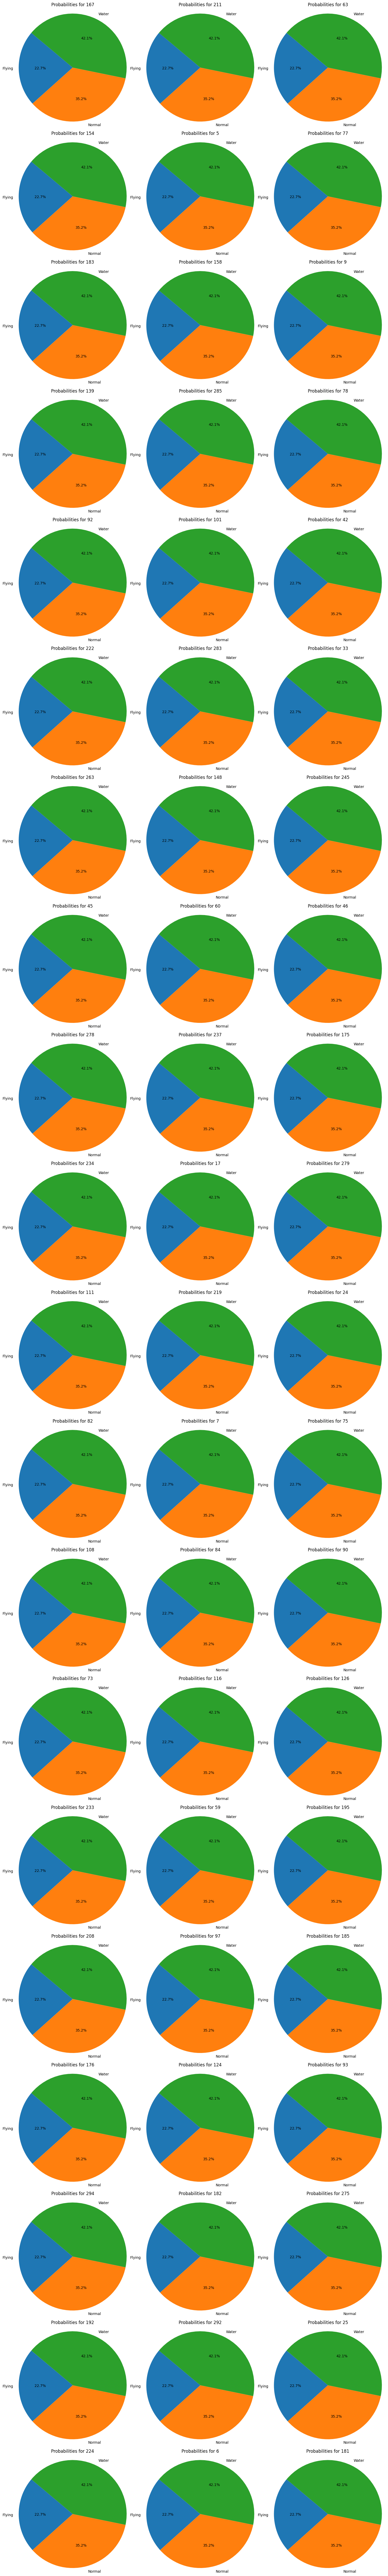

In [60]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
import math

# Load data
url = 'https://gist.github.com/rhema/3b4b729d98978b9020d85c9b9e7c9dd6/raw/e0831e96129b2a0af0c696efe132cb8503c1e631/NormalWaterFlyingPokemon.csv'
all_data = pd.read_csv(url)

# Split data into features (X) and target variable (y)
X = all_data.drop(columns=['Name', 'Type'])
y = all_data['Type']

# Convert non-numeric columns to numeric or handle categorical variables
X_numeric = X.apply(pd.to_numeric, errors='coerce').fillna(0)  # Convert non-numeric values to NaN and fill them with 0

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_numeric, y, test_size=0.2, random_state=42)

# Train model
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Predictions on test data
test_probabilities = model.predict_proba(X_test)

# Plotting
num_test_pokemon = len(X_test)
num_cols = 3
num_rows = math.ceil(num_test_pokemon / num_cols)

plt.figure(figsize=(15, 5 * num_rows))

for i, pokemon in enumerate(X_test.index):
    plt.subplot(num_rows, num_cols, i + 1)  # Create subplots dynamically
    plt.pie(test_probabilities[i], labels=model.classes_, autopct='%1.1f%%', startangle=140)
    plt.title(f'Probabilities for {pokemon}')
    plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle

plt.tight_layout()
plt.show()


In [64]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

# Load data
url = 'https://gist.github.com/rhema/3b4b729d98978b9020d85c9b9e7c9dd6/raw/e0831e96129b2a0af0c696efe132cb8503c1e631/NormalWaterFlyingPokemon.csv'
all_data = pd.read_csv(url)

# Split data into features (X) and target variable (y)
X = all_data.drop(columns=['Name', 'Type'])
y = all_data['Type']

# Convert non-numeric columns to numeric or handle categorical variables
X_numeric = X.apply(pd.to_numeric, errors='coerce').fillna(0)  # Convert non-numeric values to NaN and fill them with 0

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_numeric, y, test_size=0.2, random_state=42)

# Train model
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Predictions on test data
test_probabilities = model.predict_proba(X_test)

# Define predict function
def predict(row):
    probabilities = model.predict_proba([row])[0]
    max_prob_index = probabilities.argmax()
    predicted_class = model.classes_[max_prob_index]
    max_prob = probabilities[max_prob_index]
    return {"score": max_prob, "class": predicted_class}

# Display predictions and probabilities
for i, pokemon in enumerate(X_test.index):
    prediction = predict(X_test.iloc[i])
    print(f"{pokemon} {prediction}")
    print("Probabilities:")
    for class_name, prob in zip(model.classes_, test_probabilities[i]):
        print(f"{class_name}: {prob}")
    print()


167 {'score': 0.42097046413502104, 'class': 'Water'}
Probabilities:
Flying: 0.2274261603375527
Normal: 0.35160337552742615
Water: 0.42097046413502104

211 {'score': 0.42097046413502104, 'class': 'Water'}
Probabilities:
Flying: 0.2274261603375527
Normal: 0.35160337552742615
Water: 0.42097046413502104

63 {'score': 0.42097046413502104, 'class': 'Water'}
Probabilities:
Flying: 0.2274261603375527
Normal: 0.35160337552742615
Water: 0.42097046413502104

154 {'score': 0.42097046413502104, 'class': 'Water'}
Probabilities:
Flying: 0.2274261603375527
Normal: 0.35160337552742615
Water: 0.42097046413502104

5 {'score': 0.42097046413502104, 'class': 'Water'}
Probabilities:
Flying: 0.2274261603375527
Normal: 0.35160337552742615
Water: 0.42097046413502104

77 {'score': 0.42097046413502104, 'class': 'Water'}
Probabilities:
Flying: 0.2274261603375527
Normal: 0.35160337552742615
Water: 0.42097046413502104

183 {'score': 0.42097046413502104, 'class': 'Water'}
Probabilities:
Flying: 0.2274261603375527
Nor

In [66]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

# Load data
url = 'https://gist.github.com/rhema/3b4b729d98978b9020d85c9b9e7c9dd6/raw/e0831e96129b2a0af0c696efe132cb8503c1e631/NormalWaterFlyingPokemon.csv'
all_data = pd.read_csv(url)

# Split data into features (X) and target variable (y)
X = all_data.drop(columns=['Name', 'Type'])
y = all_data['Type']

# Convert non-numeric columns to numeric or handle categorical variables
X_numeric = X.apply(pd.to_numeric, errors='coerce').fillna(0)  # Convert non-numeric values to NaN and fill them with 0

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_numeric, y, test_size=0.2, random_state=42)

# Train model
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Define predict function
def predict(row):
    # Drop non-numeric columns like 'Name' and 'Type'
    row_numeric = row.drop(['Name', 'Type'])

    # Convert non-numeric columns to numeric or handle categorical variables
    row_numeric = row_numeric.apply(pd.to_numeric, errors='coerce').fillna(0)

    # Predict using the model
    probabilities = model.predict_proba([row_numeric])[0]
    max_prob_index = probabilities.argmax()
    predicted_class = model.classes_[max_prob_index]
    max_prob = probabilities[max_prob_index]

    return {"score": max_prob, "class": predicted_class}

# Test predictions using provided loop
for index, row in test_data.iterrows():
    pokemon_name = row['Name']
    prediction = predict(row)
    print(f"{pokemon_name}: {prediction}")


Pidgeotto: {'score': 0.42097046413502104, 'class': 'Water'}
Zubat: {'score': 0.42097046413502104, 'class': 'Water'}
Igglybuff: {'score': 0.42097046413502104, 'class': 'Water'}
Watchog: {'score': 0.42097046413502104, 'class': 'Water'}
Pyroar: {'score': 0.42097046413502104, 'class': 'Water'}
Sawsbuck: {'score': 0.42097046413502104, 'class': 'Water'}
Suicune: {'score': 0.42097046413502104, 'class': 'Water'}
Zangoose: {'score': 0.42097046413502104, 'class': 'Water'}
Azumarill: {'score': 0.42097046413502104, 'class': 'Water'}
Squirtle: {'score': 0.42097046413502104, 'class': 'Water'}
Togetic: {'score': 0.42097046413502104, 'class': 'Water'}
Gliscor: {'score': 0.42097046413502104, 'class': 'Water'}
Noibat: {'score': 0.42097046413502104, 'class': 'Water'}
Skiploom: {'score': 0.42097046413502104, 'class': 'Water'}
Snorlax: {'score': 0.42097046413502104, 'class': 'Water'}
Simipour: {'score': 0.42097046413502104, 'class': 'Water'}
Chansey: {'score': 0.42097046413502104, 'class': 'Water'}
Butterf